In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import*

In [8]:
df = pd.read_csv("../datasets/mentalhealth.csv")
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [10]:
df.dtypes

Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object

In [11]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [6]:
df.isna().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [7]:
# df = df.dropna()

In [32]:
df.isna().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [33]:
df.shape

(287162, 17)

In [34]:
df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [35]:
import datetime as dt
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Day"] = df["Timestamp"].dt.day
df["Hour"] = df["Timestamp"].dt.hour
df["Minute"] = df["Timestamp"].dt.minute
df

C:\Users\itzbi\AppData\Local\Temp\ipykernel_11728\3043472911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Timestamp"] = pd.to_datetime(df["Timestamp"])
C:\Users\itzbi\AppData\Local\Temp\ipykernel_11728\3043472911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["Timestamp"].dt.year
C:\Users\itzbi\AppData\Local\Temp\ipykernel_11728\3043472911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,...,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Year,Month,Day,Hour,Minute
3,2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,...,No,No,Yes,Maybe,Yes,2014,8,27,11,37
4,2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,...,No,No,Yes,No,Yes,2014,8,27,11,43
5,2014-08-27 11:49:00,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,...,No,No,Yes,Maybe,Not sure,2014,8,27,11,49
6,2014-08-27 11:51:00,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,...,No,No,Yes,No,Not sure,2014,8,27,11,51
7,2014-08-27 11:52:00,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,...,No,No,Yes,No,No,2014,8,27,11,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,2015-07-27 23:25:00,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,...,Yes,No,Maybe,Maybe,Not sure,2015,7,27,23,25
292360,2015-08-17 09:38:00,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,...,Yes,No,Maybe,No,Yes,2015,8,17,9,38
292361,2015-08-25 19:59:00,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,...,Yes,No,Maybe,No,No,2015,8,25,19,59
292362,2015-09-26 01:07:00,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,...,Yes,No,Maybe,No,Yes,2015,9,26,1,7


In [36]:
df = df.drop("Timestamp", axis = 1)
df

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,...,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Year,Month,Day,Hour,Minute
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,...,No,No,Yes,Maybe,Yes,2014,8,27,11,37
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,...,No,No,Yes,No,Yes,2014,8,27,11,43
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,...,No,No,Yes,Maybe,Not sure,2014,8,27,11,49
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,...,No,No,Yes,No,Not sure,2014,8,27,11,51
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,...,No,No,Yes,No,No,2014,8,27,11,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,...,Yes,No,Maybe,Maybe,Not sure,2015,7,27,23,25
292360,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,...,Yes,No,Maybe,No,Yes,2015,8,17,9,38
292361,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,...,Yes,No,Maybe,No,No,2015,8,25,19,59
292362,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,...,Yes,No,Maybe,No,Yes,2015,9,26,1,7


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])
df["self_employed"] = LabelEncoder().fit_transform(df["self_employed"])
df["family_history"] = LabelEncoder().fit_transform(df["family_history"])
df["treatment"] = LabelEncoder().fit_transform(df["treatment"])
df["Growing_Stress"] = LabelEncoder().fit_transform(df["Growing_Stress"])
df["Coping_Struggles"] = LabelEncoder().fit_transform(df["Coping_Struggles"])
df

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,...,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Year,Month,Day,Hour,Minute
3,0,United States,Corporate,0,1,1,1-14 days,2,No,Yes,...,0,No,Yes,Maybe,Yes,2014,8,27,11,37
4,0,United States,Corporate,0,1,1,1-14 days,2,No,Yes,...,0,No,Yes,No,Yes,2014,8,27,11,43
5,0,Poland,Corporate,0,0,1,1-14 days,2,No,Yes,...,0,No,Yes,Maybe,Not sure,2014,8,27,11,49
6,0,Australia,Corporate,0,1,1,1-14 days,2,No,Yes,...,0,No,Yes,No,Not sure,2014,8,27,11,51
7,0,United States,Corporate,0,0,0,1-14 days,2,No,Yes,...,0,No,Yes,No,No,2014,8,27,11,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,1,United States,Business,1,1,1,15-30 days,1,Maybe,No,...,1,No,Maybe,Maybe,Not sure,2015,7,27,23,25
292360,1,South Africa,Business,0,1,1,15-30 days,1,Maybe,No,...,1,No,Maybe,No,Yes,2015,8,17,9,38
292361,1,United States,Business,0,1,0,15-30 days,1,Maybe,No,...,1,No,Maybe,No,No,2015,8,25,19,59
292362,1,United States,Business,0,1,1,15-30 days,1,Maybe,No,...,1,No,Maybe,No,Yes,2015,9,26,1,7


In [39]:
countryDummies = pd.get_dummies(df["Country"], prefix = "country")
occupationDummies = pd.get_dummies(df["Occupation"], prefix = "occupation")
daysindoorsDummies = pd.get_dummies(df["Days_Indoors"], prefix = "daysindoors")
changeshabitsDummies = pd.get_dummies(df["Changes_Habits"], prefix = "changeshabits")
mentalhealthhistoryDummies = pd.get_dummies(df["Mental_Health_History"], prefix = "mentalheathhistory")
workinterestDummies = pd.get_dummies(df["Work_Interest"], prefix = "workinterest")
socialweaknessDummies = pd.get_dummies(df["Social_Weakness"], prefix = "soacialweakness")
careoptionsDummies = pd.get_dummies(df["care_options"], prefix = "careoptions")
moodswingsDummies = pd.get_dummies(df["Mood_Swings"], prefix = "moodswings")

In [40]:
df = pd.concat([df, countryDummies], axis = 1)
df = pd.concat([df, occupationDummies], axis = 1)
df = pd.concat([df, daysindoorsDummies], axis = 1)
df = pd.concat([df, changeshabitsDummies], axis = 1)
df = pd.concat([df, mentalhealthhistoryDummies], axis = 1)
df = pd.concat([df, workinterestDummies], axis = 1)
df = pd.concat([df, socialweaknessDummies], axis = 1)
df = pd.concat([df, careoptionsDummies], axis = 1)
df = pd.concat([df, moodswingsDummies], axis = 1)
df

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,...,workinterest_Yes,soacialweakness_Maybe,soacialweakness_No,soacialweakness_Yes,careoptions_No,careoptions_Not sure,careoptions_Yes,moodswings_High,moodswings_Low,moodswings_Medium
3,0,United States,Corporate,0,1,1,1-14 days,2,No,Yes,...,0,0,0,1,0,0,1,0,0,1
4,0,United States,Corporate,0,1,1,1-14 days,2,No,Yes,...,0,0,0,1,0,0,1,0,0,1
5,0,Poland,Corporate,0,0,1,1-14 days,2,No,Yes,...,0,0,0,1,0,1,0,0,0,1
6,0,Australia,Corporate,0,1,1,1-14 days,2,No,Yes,...,0,0,0,1,0,1,0,0,0,1
7,0,United States,Corporate,0,0,0,1-14 days,2,No,Yes,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,1,United States,Business,1,1,1,15-30 days,1,Maybe,No,...,0,1,0,0,0,1,0,0,1,0
292360,1,South Africa,Business,0,1,1,15-30 days,1,Maybe,No,...,0,1,0,0,0,0,1,0,1,0
292361,1,United States,Business,0,1,0,15-30 days,1,Maybe,No,...,0,1,0,0,1,0,0,0,1,0
292362,1,United States,Business,0,1,1,15-30 days,1,Maybe,No,...,0,1,0,0,0,0,1,0,1,0


In [41]:
df = df.drop("Country",axis = 1)
df = df.drop("Occupation",axis = 1)
df = df.drop("Days_Indoors",axis = 1)
df = df.drop("Changes_Habits",axis = 1)
df = df.drop("Mental_Health_History",axis = 1)
df = df.drop("Work_Interest",axis = 1)
df = df.drop("Social_Weakness",axis = 1)
df = df.drop("care_options",axis = 1)
df = df.drop("Mood_Swings",axis = 1)
df

,Gender,self_employed,family_history,treatment,Growing_Stress,Coping_Struggles,mental_health_interview,Year,Month,Day,...,workinterest_Yes,soacialweakness_Maybe,soacialweakness_No,soacialweakness_Yes,careoptions_No,careoptions_Not sure,careoptions_Yes,moodswings_High,moodswings_Low,moodswings_Medium
3,0,0,1,1,2,0,Maybe,2014,8,27,...,0,0,0,1,0,0,1,0,0,1
4,0,0,1,1,2,0,No,2014,8,27,...,0,0,0,1,0,0,1,0,0,1
5,0,0,0,1,2,0,Maybe,2014,8,27,...,0,0,0,1,0,1,0,0,0,1
6,0,0,1,1,2,0,No,2014,8,27,...,0,0,0,1,0,1,0,0,0,1
7,0,0,0,0,2,0,No,2014,8,27,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,1,1,1,1,1,1,Maybe,2015,7,27,...,0,1,0,0,0,1,0,0,1,0
292360,1,0,1,1,1,1,No,2015,8,17,...,0,1,0,0,0,0,1,0,1,0
292361,1,0,1,0,1,1,No,2015,8,25,...,0,1,0,0,1,0,0,0,1,0
292362,1,0,1,1,1,1,No,2015,9,26,...,0,1,0,0,0,0,1,0,1,0


In [42]:
df.dtypes

Gender                  int32
self_employed           int32
family_history          int32
treatment               int32
Growing_Stress          int32
                        ...  
careoptions_Not sure    uint8
careoptions_Yes         uint8
moodswings_High         uint8
moodswings_Low          uint8
moodswings_Medium       uint8
Length: 75, dtype: object

In [43]:
from keras.utils import to_categorical

In [47]:
X = df.drop("mental_health_interview", axis = 1)
X

,Gender,self_employed,family_history,treatment,Growing_Stress,Coping_Struggles,Year,Month,Day,Hour,...,workinterest_Yes,soacialweakness_Maybe,soacialweakness_No,soacialweakness_Yes,careoptions_No,careoptions_Not sure,careoptions_Yes,moodswings_High,moodswings_Low,moodswings_Medium
3,0,0,1,1,2,0,2014,8,27,11,...,0,0,0,1,0,0,1,0,0,1
4,0,0,1,1,2,0,2014,8,27,11,...,0,0,0,1,0,0,1,0,0,1
5,0,0,0,1,2,0,2014,8,27,11,...,0,0,0,1,0,1,0,0,0,1
6,0,0,1,1,2,0,2014,8,27,11,...,0,0,0,1,0,1,0,0,0,1
7,0,0,0,0,2,0,2014,8,27,11,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,1,1,1,1,1,1,2015,7,27,23,...,0,1,0,0,0,1,0,0,1,0
292360,1,0,1,1,1,1,2015,8,17,9,...,0,1,0,0,0,0,1,0,1,0
292361,1,0,1,0,1,1,2015,8,25,19,...,0,1,0,0,1,0,0,0,1,0
292362,1,0,1,1,1,1,2015,9,26,1,...,0,1,0,0,0,0,1,0,1,0


In [48]:
y = df["mental_health_interview"]
y

3         Maybe
4            No
5         Maybe
6            No
7            No
          ...  
292359    Maybe
292360       No
292361       No
292362       No
292363       No
Name: mental_health_interview, Length: 287162, dtype: object

In [49]:
X_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X), columns = X.columns)
X_scaled

,Gender,self_employed,family_history,treatment,Growing_Stress,Coping_Struggles,Year,Month,Day,Hour,...,workinterest_Yes,soacialweakness_Maybe,soacialweakness_No,soacialweakness_Yes,careoptions_No,careoptions_Not sure,careoptions_Yes,moodswings_High,moodswings_Low,moodswings_Medium
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.6,0.866667,0.478261,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.6,0.866667,0.478261,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.6,0.866667,0.478261,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.6,0.866667,0.478261,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.6,0.866667,0.478261,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287157,1.0,1.0,1.0,1.0,0.5,1.0,0.5,0.5,0.866667,1.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
287158,1.0,0.0,1.0,1.0,0.5,1.0,0.5,0.6,0.533333,0.391304,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
287159,1.0,0.0,1.0,0.0,0.5,1.0,0.5,0.6,0.800000,0.826087,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
287160,1.0,0.0,1.0,1.0,0.5,1.0,0.5,0.7,0.833333,0.043478,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [50]:
from sklearn.preprocessing import LabelEncoder
y_scaled = to_categorical(LabelEncoder().fit_transform(y))
y_scaled

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.3, random_state = 42)

In [52]:
X_train.shape, y_train.shape

((201013, 74), (201013, 3))

In [53]:
X_test.shape, y_test.shape

((86149, 74), (86149, 3))

In [1]:
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Input((X_train.shape[1], )))
modelo.add(tf.keras.layers.Dense(256, activation = "relu"))
modelo.add(tf.keras.layers.Dense(128, activation = "relu"))
modelo.add(tf.keras.layers.Dense(64, activation = "relu"))
modelo.add(tf.keras.layers.Dense(y_train.shape[1], activation = "softmax"))
modelo.summary()

NameError: name 'tf' is not defined

In [61]:
modelo.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10)
modelo.fit(X_train, y_train, validation_split = 0.2, batch_size = 256, epochs = 5, callbacks = [early_stop])

Epoch 1/5
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9898 - loss: 0.0236 - val_accuracy: 0.9921 - val_loss: 0.0175
Epoch 2/5
629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9903 - loss: 0.0220 - val_accuracy: 0.9917 - val_loss: 0.0190
Epoch 3/5
629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9913 - loss: 0.0196 - val_accuracy: 0.9899 - val_loss: 0.0221
Epoch 4/5
629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0213 - val_accuracy: 0.9899 - val_loss: 0.0214
Epoch 5/5
629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0195 - val_accuracy: 0.9917 - val_loss: 0.0170


In [62]:
df_historia = pd.DataFrame(modelo.history.history)
df_historia

,accuracy,loss,val_accuracy,val_loss
0,0.990616,0.021585,0.992115,0.017541
1,0.990162,0.022302,0.991717,0.019010
2,0.990691,0.021636,0.989851,0.022120
3,0.989957,0.023660,0.989876,0.021371
4,0.991362,0.020270,0.991692,0.017015


<Axes: >

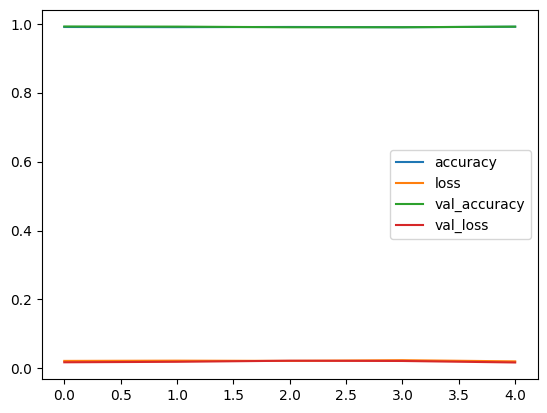

In [67]:
df_historia.plot()

In [108]:
y_pred = modelo.predict(X_test)

2693/2693 ━━━━━━━━━━━━━━━━━━━━ 2s 696us/step


In [109]:
y_pred = np.round(y_pred)
y_pred

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [110]:
# print("Accuracy: ", accuracy_score(y_test, y_pred) * 100, "%")